In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import mglearn as mg

In [2]:
#when you load dataset externally

dataset = pd.read_csv('IRIS.csv')
data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]
target_names = target.unique()
values = [i for i in range(len(target_names))]
mapping = { k: v for  (k,v) in zip(target_names, values) }
target = target.map(mapping)
print(target_names)
print(mapping)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [3]:
# #when you load dataset from sklearn.datasets

# dataset = load_iris()
# data = dataset.data
# target = dataset.target

In [4]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
# normalized_data = data

In [5]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans_labels = kmeans.fit_predict(normalized_data)
kmeans_silhouette = silhouette_score(normalized_data, kmeans_labels)
print(f'k-means silhouette score : {kmeans_silhouette}')

k-means silhouette score : 0.4787241921049546


In [6]:
gmm = GaussianMixture(n_components = k, random_state = 42)
gmm_labels = gmm.fit_predict(normalized_data)
gmm_silhouette = silhouette_score(normalized_data, gmm_labels )
print(f'EM Algorithm silhouette score : {gmm_silhouette}')

EM Algorithm silhouette score : 0.4091841624317957


Text(0.5, 1.0, 'EM clusters ')

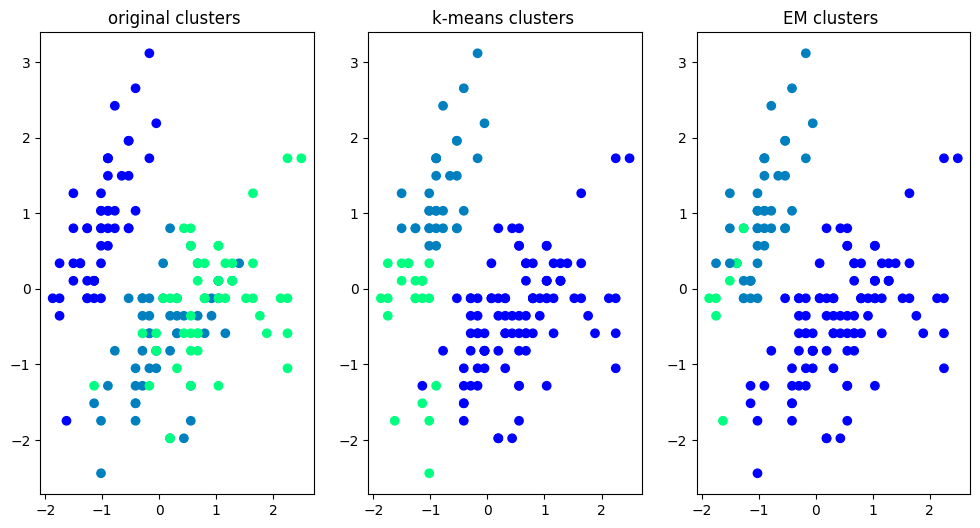

In [7]:
plt.figure(figsize = (12, 6))
plt.subplot(1,3,1)
plt.scatter(normalized_data[:,0], normalized_data[:,1],c = target,cmap = 'winter',  marker ='o')
plt.title('original clusters ')

plt.subplot(1,3,2)
plt.scatter(normalized_data[:,0], normalized_data[:,1],c = kmeans_labels, cmap = 'winter', marker ='o')
plt.title('k-means clusters ')

plt.subplot(1,3,3)
plt.scatter(normalized_data[:,0], normalized_data[:,1],c = gmm_labels, cmap = 'winter', marker ='o')
plt.title('EM clusters ')

In [8]:
print(f'k-Means Silhouette Score: {kmeans_silhouette}')
print(f'EM Algorithm Silhouette Score: {gmm_silhouette}')

k-Means Silhouette Score: 0.4787241921049546
EM Algorithm Silhouette Score: 0.4091841624317957


In [9]:
if kmeans_silhouette > gmm_silhouette:
    print('k-Means clustering provides better quality clustering based on the silhouette score.')
else:
    print('EM algorithm provides better quality clustering based on the silhouette score.')


k-Means clustering provides better quality clustering based on the silhouette score.
